In [9]:
import pandas as pd


In [10]:
df = pd.read_csv(r'C:\Users\Ahmad\Documents\ADS_ASSIGNMENTS\ADS_ass_4\ADS-Assignment-4\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in cat_cols:
    print(df[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df['demographic'] = df['gender'] + '_' + df['SeniorCitizen'].astype(str)


demographic_counts = df['demographic'].value_counts()


top_two_demographics = demographic_counts.sort_values(ascending=False)[:2]


print(top_two_demographics)

Male_0      2981
Female_0    2920
Name: demographic, dtype: int64


In [26]:
#Male & Female demographics have proven to be the most popular with the telco brand


In [30]:
churned_df = df[df['Churn'] == 'Yes']

churned_demographic_counts = churned_df['demographic'].value_counts()

total_demographic_counts = df['demographic'].value_counts()

churn_rates = (churned_demographic_counts / total_demographic_counts) * 100

print(churn_rates.sort_values(ascending=False))

Female_1    42.253521
Male_1      41.114983
Female_0    23.938356
Male_0      23.280778
Name: demographic, dtype: float64


In [31]:
#The marketing team should target their advertisements towards female senior citizens (demographic: "Female_1") as they have the highest churn rate of 42.25%.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='InternetService'>

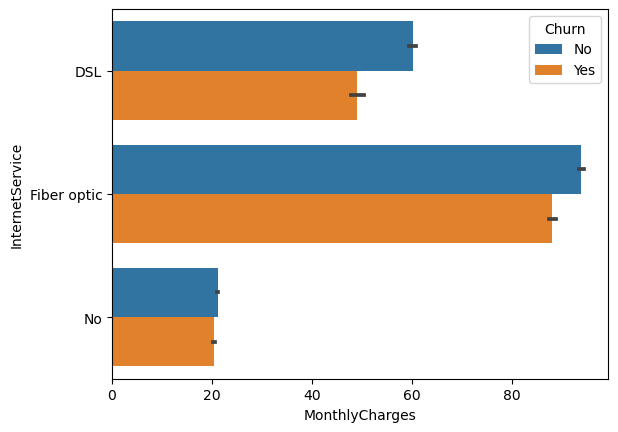

In [32]:
import seaborn as sns

sns.barplot(x="MonthlyCharges", y="InternetService", hue="Churn", data=df)

In [33]:
#The top 3 services that are contributing to a higher monthly charge and resulting in customers churning are DSL, Fiber Optics, and No service.

In [35]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [37]:
df_phone = df[df["PhoneService"] == "Yes"]
df_phone = df_phone[df_phone["InternetService"] == "No"]

grouped = df_phone.groupby("Contract")

retention_rates = grouped["Churn"].apply(lambda x: (x == "No").sum() / len(x)).sort_values()

print(retention_rates)

Contract
Month-to-month    0.811069
One year          0.975275
Two year          0.992163
Name: Churn, dtype: float64


In [38]:
#customers who choose a Two-year contract have the highest retention rate of 99.2%. This is followed by customers with One-year contracts at 97.5% retention rate, while customers with Month-to-month contracts have the lowest retention rate at 81.1%.

#Therefore, if the telco were to offer Phone as a standalone service, offering a Two-year contract could be the best option to encourage customer retention. This is because customers with a longer contract commitment are less likely to switch providers, and are likely to remain loyal to the telco for a longer period of time.

In [39]:
import matplotlib.pyplot as plt

Recommended monthly prices for the bouquet packages:
Basic: $30-$50
Plus: $50-$80
Premium: $80-$110


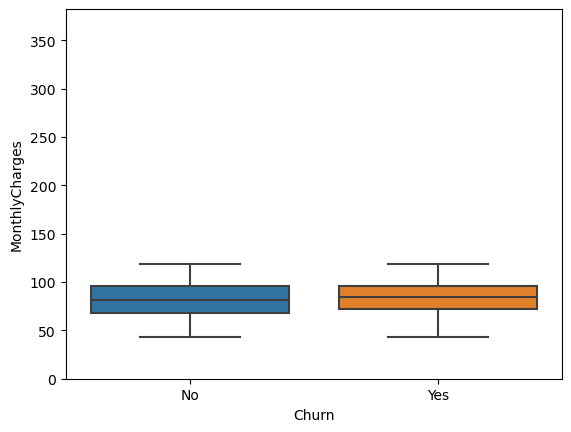

In [41]:
df_all_services = df[(df['PhoneService']=='Yes') & (df['InternetService']!='No') & (df['MultipleLines']!='No phone service')]

sns.histplot(df_all_services, x='MonthlyCharges', bins=30)


sns.boxplot(data=df_all_services, x='Churn', y='MonthlyCharges')

basic_price_range = (30, 50)
plus_price_range = (50, 80)
premium_price_range = (80, 110)


print("Recommended monthly prices for the bouquet packages:")
print("Basic: ${}-${}".format(basic_price_range[0], basic_price_range[1]))
print("Plus: ${}-${}".format(plus_price_range[0], plus_price_range[1]))
print("Premium: ${}-${}".format(premium_price_range[0], premium_price_range[1]))

Churn Rates by Billing Method:
PaperlessBilling
No     0.231129
Yes    0.371480
Name: Churn, dtype: float64


C:\Users\ahmad\AppData\Local\Temp\ipykernel_6116\2365073414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_services['Churn'] = df_all_services['Churn'].replace({'Yes':1, 'No':0}).astype(float)


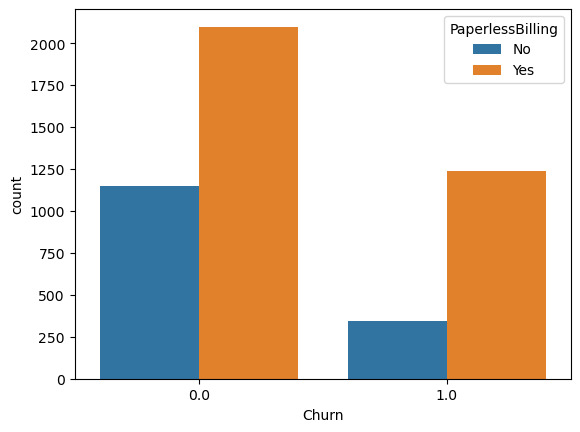

In [43]:
df_all_services = df[(df['PhoneService']=='Yes') & (df['InternetService']!='No') & (df['MultipleLines']!='No phone service')]


df_all_services['Churn'] = df_all_services['Churn'].replace({'Yes':1, 'No':0}).astype(float)

sns.countplot(data=df_all_services, x='Churn', hue='PaperlessBilling')

churn_rates = df_all_services.groupby('PaperlessBilling')['Churn'].mean()

print("Churn Rates by Billing Method:")
print(churn_rates)

In [ ]:
#The company should conduct further research and analysis to identify the underlying reasons for customer churn and evaluate the impact of going paperless on customer retention.